<a href="https://colab.research.google.com/github/IT21162428/Research---Digital-Companion/blob/IT21338984_Imesh/AppearanceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.3
aiohttp                            3.11.2
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.6
astropy-iers-data                  0.2024.11.18.0.35.2
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/RESEARCH/data'

In [ ]:
os.listdir(data_dir)

['MenFashion', 'WomenFashion']

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/drive/MyDrive/RESEARCH/data/MenFashion/depositphotos_189759040-stock-photo-fashion-stylish-confident-portrair-handsome.jpg
Image not in ext list /content/drive/MyDrive/RESEARCH/data/MenFashion/Fashion-Dress-Men-s-Suits-Apparel-3-Pieces-Suitd-Slim-Mens-Wedding-Suit (1).webp
Image not in ext list /content/drive/MyDrive/RESEARCH/data/MenFashion/Fashion-Dress-Men-s-Suits-Apparel-3-Pieces-Suitd-Slim-Mens-Wedding-Suit.webp
Image not in ext list /content/drive/MyDrive/RESEARCH/data/MenFashion/Old-Man-Style.jpg
Image not in ext list /content/drive/MyDrive/RESEARCH/data/MenFashion/Dress-Clothes-for-Men.jpg
Image not in ext list /content/drive/MyDrive/RESEARCH/data/MenFashion/shop_all.webp
Image not in ext list /content/drive/MyDrive/RESEARCH/data/MenFashion/eastern.webp
Image not in ext list /content/drive/MyDrive/RESEARCH/data/MenFashion/Mens-Summer-Fashion-ZODIAC-FASHION-STYLES-FOR-MEN.webp
Image not in ext list /content/drive/MyDrive/RESEARCH/data/MenFashion/im

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 184 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
# Get another batch from the iterator
batch = data_iterator.next()

In [ ]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# Class 1 = WOMEN FASHION
# Class 0 = MEN FASHION
batch[1]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int32)

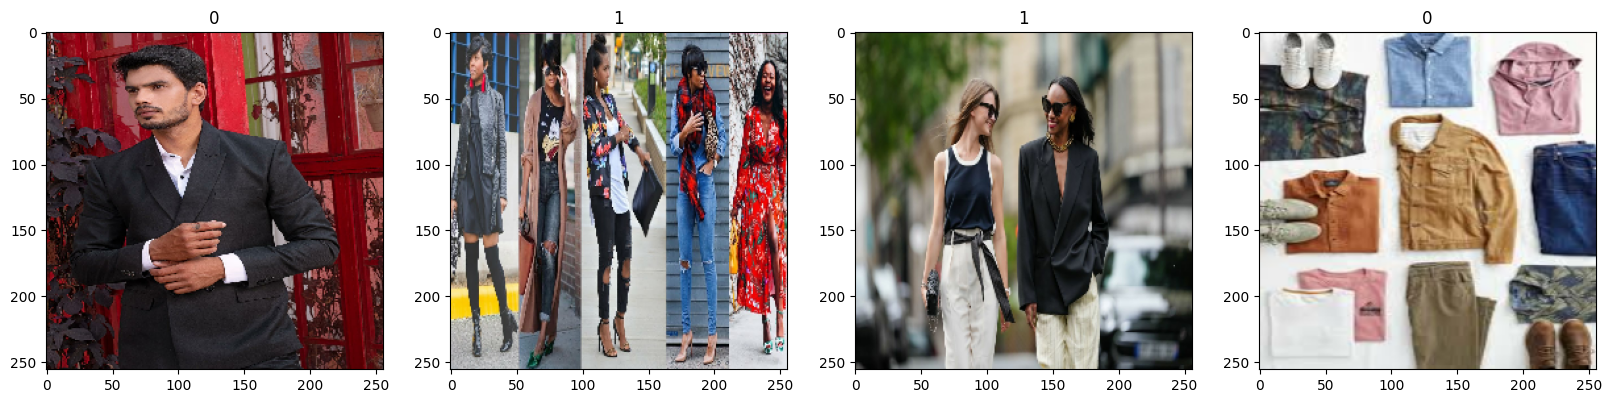

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.max()

1.0

### 2. Preprocess Data

#### 2.1 Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

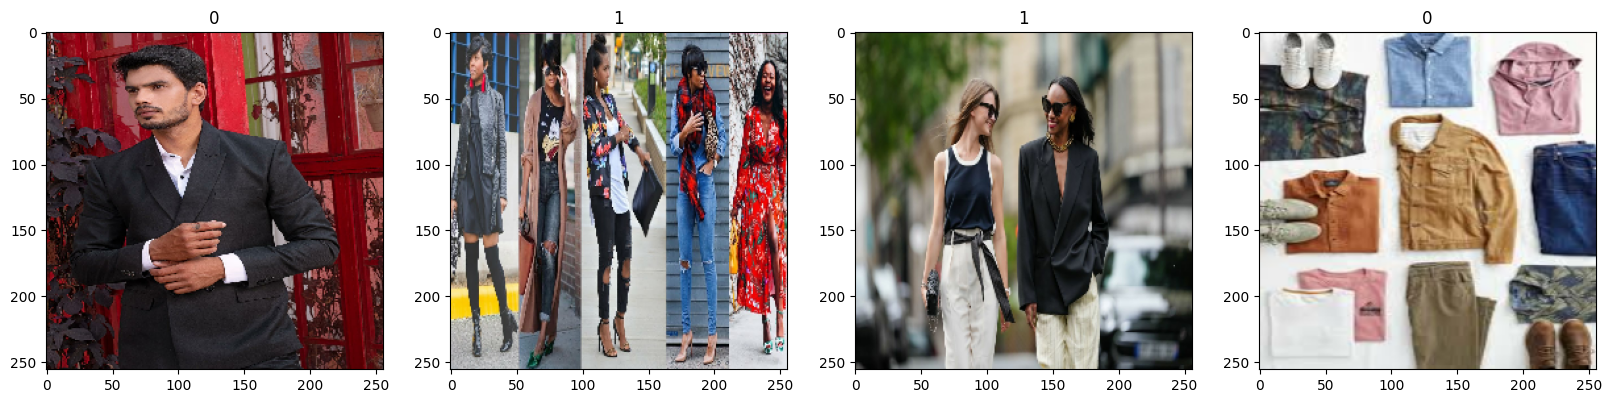

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### 2.2 Split Data

In [ ]:
len(data)

6

In [ ]:
7*.2

1.4000000000000001

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

7